<a href="https://colab.research.google.com/github/skywalker0803r/ruby_research/blob/main/crypto/BTCUSDT(%E8%B6%85%E7%B4%9A%E8%B6%A8%E5%8B%A2%E7%AD%96%E7%95%A5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 設定

In [223]:
!pip install finlab_crypto > log.txt
!pip install pandas-ta > log.txt

In [224]:
import finlab_crypto
finlab_crypto.setup()

In [241]:
from binance.client import Client

api_key = 'aJOD1H8jl0396wDSo0k4PnZftjGWHQEDLoCh4T2OhbgljMBoAi8PTMRIPhsxHpDh'
api_secret = 'VpdtNdN9j1ZnTu55NzmVGeffam0yZzoGAEs83gLct5y0WnEDH2y7C2Ptkkv0cuj0'
pair = 'BTCUSDT'
freq = '15m'
nbars = 10000
client = Client(api_key,api_secret)

# 載入歷史價格資料

In [242]:
ohlcv = finlab_crypto.crawler.get_nbars_binance(pair,freq,nbars,client)
ohlcv.tail()

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,,
2021-01-19 06:30:00+00:00,1.611038e+12,36501.40,36720.00,36496.20,36604.07,876.759586,1.611039e+12,3.212685e+07,19318.0,466.579783,1.709772e+07,0.0
2021-01-19 06:45:00+00:00,1.611039e+12,36604.07,36753.31,36464.63,36599.55,626.930055,1.611040e+12,2.292815e+07,14127.0,286.594802,1.048330e+07,0.0
2021-01-19 07:00:00+00:00,1.611040e+12,36599.55,36719.22,36538.28,36578.37,577.934480,1.611040e+12,2.115214e+07,17821.0,268.959799,9.845700e+06,0.0
2021-01-19 07:15:00+00:00,1.611040e+12,36578.36,36700.00,36470.62,36670.70,641.913033,1.611041e+12,2.347186e+07,17374.0,288.573101,1.055276e+07,0.0
2021-01-19 07:30:00+00:00,1.611041e+12,36670.75,36676.36,36530.81,36632.07,300.112379,1.611042e+12,1.099008e+07,7976.0,135.301405,4.954527e+06,0.0


# 超級趨勢指標

In [243]:
from pandas_ta.overlap.supertrend import supertrend
supertrend(ohlcv['high'],ohlcv['low'],ohlcv['close'],length=3,multiplier=1)

,SUPERT_3_1.0,SUPERTd_3_1.0,SUPERTl_3_1.0,SUPERTs_3_1.0
timestamp,,,,
2020-10-06 00:00:00+00:00,0.000000,1,NaN,NaN
2020-10-06 00:15:00+00:00,10754.805000,1,10754.805000,NaN
2020-10-06 00:30:00+00:00,10754.805000,1,10754.805000,NaN
2020-10-06 00:45:00+00:00,10774.109077,-1,NaN,10774.109077
2020-10-06 01:00:00+00:00,10774.109077,-1,NaN,10774.109077
...,...,...,...,...
2021-01-19 06:30:00+00:00,36358.575706,1,36358.575706,NaN
2021-01-19 06:45:00+00:00,36358.575706,1,36358.575706,NaN
2021-01-19 07:00:00+00:00,36393.385870,1,36393.385870,NaN


# 定義策略

In [244]:
@finlab_crypto.Strategy(f=1,n=3)
def super_strategy(ohlcv):
  f = super_strategy.f
  n = super_strategy.n
  close = ohlcv['close']
  SuperTrend = supertrend(ohlcv['high'],ohlcv['low'],ohlcv['close'],length=n,multiplier=f)['SUPERT_{}_{}.0'.format(n,f)]
  figures = {'overlaps': {'SuperTrend':SuperTrend}}
  buy = (close > SuperTrend) & (close.shift() < SuperTrend.shift()) 
  sell = (close < SuperTrend) & (close.shift() > SuperTrend.shift()) 
  return buy ,sell ,figures

# 回測

In [245]:
portfolio = super_strategy.backtest(ohlcv,freq=freq,plot=True)

# 優化

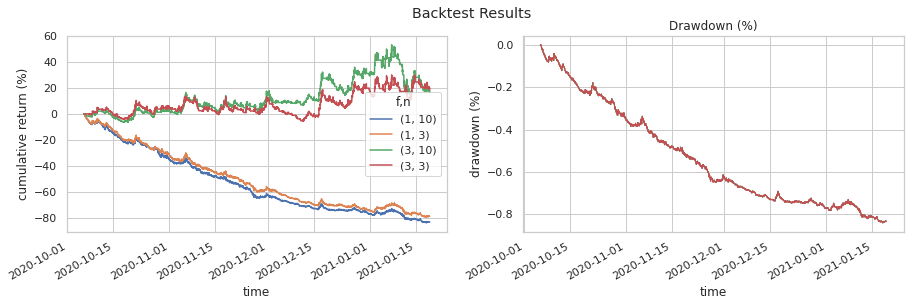

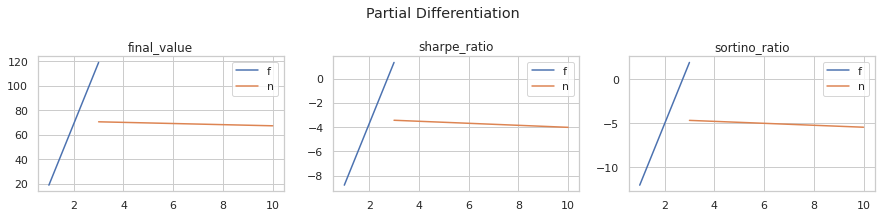

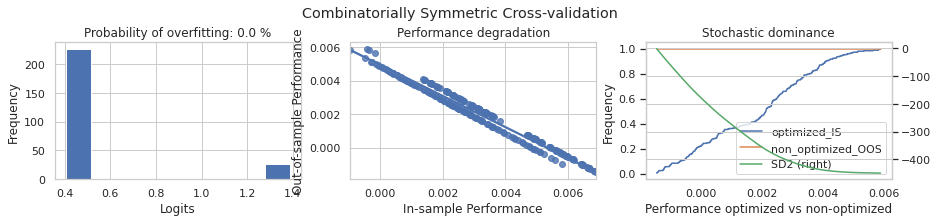

Output()

In [246]:
import numpy as np

vars = {
  'f': [1,3], 
  'n': [3,10]
}

portfolio = super_strategy.backtest(ohlcv, vars ,freq=freq, plot=True)

In [247]:
vars =  {'f': 3, 'n': 10}
portfolio = super_strategy.backtest(ohlcv, vars,freq=freq, plot=True)